<a href="https://colab.research.google.com/github/hwarang97/hukppenhiem/blob/main/Dacon_pytorch_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 참조 사이트 : DACON pytorch day2 by yun99
link : https://dacon.io/en/codeshare/4495

# 라이브러리

In [1]:
import torch 
import numpy as np # 데이터를 불러오기 위해서 필요
import pandas as pd # 데이터 속성 알아보기 위해서 추가
from sklearn.datasets import make_blobs # 데이터셋
import matplotlib.pyplot as plt # 테이터가 잘 라벨링 되었는지 확인하기용

# 데이터 준비

## <추가학습>

- centers : clust를 만들건데 중심점을 잡아줌
- cluster_std : center로부터 얼마만큼씩 떨어져있을 것인지 결정

In [47]:
# # make_blobs 매개변수 실험

# n_dim = 2
# x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

# x_ = torch.tensor(x_train, dtype=torch.float)
# y_ = torch.tensor(y_train, dtype=torch.float)

# for i in [0,1]:
#     y_[y_==i] = 0

# for i in [2,3]:
#     y_[y_==i] = 1

# print(y_)

# for i in range(len(y_)):
#     plt.plot(x_[i,0], x_[i,1], 'ro' if y_[i]==0 else 'bo')

In [ ]:
# 자세한 파라미터 값을 무시
# 작성하는 방식에 대해서 알아보자

n_dim = 2 # 특성 갯수 지정
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

# 데이터 탐색

In [ ]:
import pandas as pd

y = pd.DataFrame(y_train)
y.describe()

,0
count,80.000000
mean,1.500000
std,1.125088
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [ ]:
y.value_counts()

0    20
1    20
2    20
3    20
dtype: int64

# 로컬 함수들

In [ ]:
# y label이 4개 -> 2개로 바꿔주기 위한 작업
def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_==f] = to_
    return y

y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

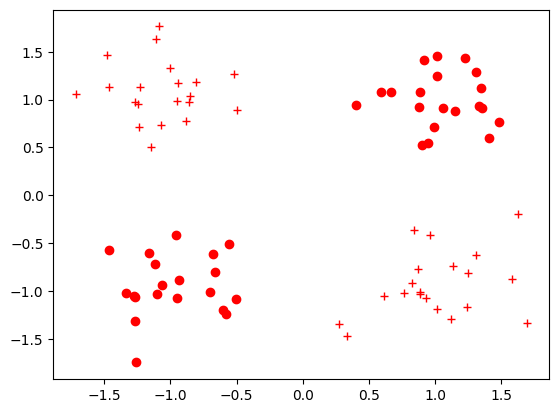

In [ ]:
# 데이터가 제대로 레이블링 되었는지 확인하기 위해서 시각화
def vis_data(x,y = None, c='r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c) # 2차원에 마크를 다르게 표시함으로 3차원 데이터를 표현
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_==0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [ ]:
# numpy type -> tensor type

# x_train = torch.FloatTensor(x_train) # CPU 전용 tensor(dtyp=torch.float)
x_train = torch.tensor(x_train, dtype=torch.float) # 범용적으로 쓰이는 텐서
print(x_train.shape)
x_test = torch.tensor(x_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

torch.Size([80, 2])


# 신경망 모델 구현

In [48]:
from torch import nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.linear = nn.Sequential(
            nn.Linear(self.input_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x


In [ ]:
# 신경망 객체 생성 및 변수와 알고리즘 정의
model = NeuralNet(2,5)
learning_rate = 0.03
crierion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# 학습 안한 모델 성능 확인
model.eval()
test_loss_before = crierion(model(x_test).squeeze(), y_test) # model(x_test) : ([20,1]), y_test : ([20]) 이라서 squeeze 진행
print(f'Before Training, test loss is {test_loss_before.item()}')

Before Training, test loss is 0.7370400428771973


In [ ]:
for epoch in range(1,epochs+1):
    # 여기에 dataloader를 통해서 batch_size를 설정하지 않았으므로, 모든 데이터를 한번에 넣어서 한번 학습시키는 형태로 보인다
    model.train()
    
    loss = crierion(model(x_train).squeeze(), y_train) # 학습 루프 내부에 있어야 실시간으로 변화를 파악할 수 있음
    if epoch % 100 == 0:
        print(f'learning at {epoch} : {loss.item()}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

learning at 100 : 0.012317972257733345
learning at 200 : 0.003011984284967184
learning at 300 : 0.0014556574169546366
learning at 400 : 0.0008860438247211277
learning at 500 : 0.0006023942260071635
learning at 600 : 0.0004385857318993658
learning at 700 : 0.0003343171556480229
learning at 800 : 0.00026331940898671746
learning at 900 : 0.00021304466645233333
learning at 1000 : 0.00017622097220737487
learning at 1100 : 0.00014799993368797004
learning at 1200 : 0.00012588953541126102
learning at 1300 : 0.00010823687625816092
learning at 1400 : 9.390805644216016e-05
learning at 1500 : 8.212800457840785e-05
learning at 1600 : 7.232235657284036e-05
learning at 1700 : 6.407350156223401e-05
learning at 1800 : 5.7072622439591214e-05
learning at 1900 : 5.108485493110493e-05
learning at 2000 : 4.5932734792586416e-05


## <이상할 경우 확인해 볼 것!>

데이터를 이상한걸 불러왔다면, 모델이 제대로 되어도 학습이 진행 안될 수 있다! 실제로 데이터의 cluster 수치를 지정하지 않았더니 0.5 정도에서 멈추는걸 볼 수 있었음

데이터가 이상하면 패턴을 발견하지 못하는게 당연

In [ ]:
model.eval()
test_loss_after = crierion(model(x_test).squeeze(), y_test)
print(f'After Training, test loss is {test_loss_after.item()}')

After Training, test loss is 0.00019901877385564148


In [ ]:
# 학습 모델을 .pt형태로 저장
torch.save(model.state_dict(), './model.pt')
# state_dict()함수는 모델 내 가중치들이 딕셔너리 형태로 {레이어 이름: 가중치 텐서와 편향 텐서}와 같이 표현된 데이터
print(f'state_dict format of the model: {model.state_dict()}')

state_dict format of the model: OrderedDict([('linear.0.weight', tensor([[ 2.2096,  2.2211],
        [ 3.4272, -3.3436],
        [-2.6870, -2.6325],
        [ 1.6983,  2.8121],
        [-3.2077,  3.4507]])), ('linear.0.bias', tensor([-0.6402, -0.0234,  0.8337, -0.4193, -0.0439])), ('linear.2.weight', tensor([[-3.0974,  3.2982, -2.5200, -1.7240,  2.8643]])), ('linear.2.bias', tensor([-1.2703]))])


In [ ]:
# 저장된 모델 정보를 불러와서 학습 생략하는 방법
new_model = NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print(f'벡터 [-1, 1]이 레이블 1을 가질 확률은 {new_model(torch.FloatTensor([-1,1])).item()}')

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9999994039535522
